## Diabets 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant 
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
- BloodPressure: Diastolic blood pressure (mm Hg) 
- SkinThickness: Triceps skin fold thickness (mm) 
- Insulin: 2-Hour serum insulin (mu U/ml) 
- BMI: Body mass index (weight in kg/(height in m)^2) 
- DiabetesPedigreeFunction: Diabetes pedigree function 
- Age: Age (years) 
- Outcome: Class variable (0 or 1)


#### Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

#### Number of Instances: 768

#### Number of Attributes: 8 plus class 

#### For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

#### Missing Attribute Values: Yes

#### Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")


## 1. Installing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.


/kaggle/input/diabetes-data-set/diabetes.csv


## 2. EDA (Exploratory of Data Analysis)
### 2.1. Data Preperation

In [2]:
#Reading the dataset
df = pd.read_csv("../input/diabetes-data-set/diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.00,3.85,3.37,0.00,0.00,1.00,3.00,6.00,9.00,10.00,13.00,17.00
Glucose,768.00,120.89,31.97,0.00,85.00,99.00,117.00,140.25,167.00,181.00,196.00,199.00
BloodPressure,768.00,69.11,19.36,0.00,54.00,62.00,72.00,80.00,88.00,90.00,106.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,0.00,23.00,32.00,40.00,44.00,51.33,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,0.00,30.50,127.25,210.00,293.00,519.90,846.00
BMI,768.00,31.99,7.88,0.00,23.60,27.30,32.00,36.60,41.50,44.39,50.76,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.17,0.24,0.37,0.63,0.88,1.13,1.70,2.42
Age,768.00,33.24,11.76,21.00,22.00,24.00,29.00,41.00,51.00,58.00,67.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00


In [5]:
df["Outcome"].value_counts()*100/len(df)

0   65.10
1   34.90
Name: Outcome, dtype: float64

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

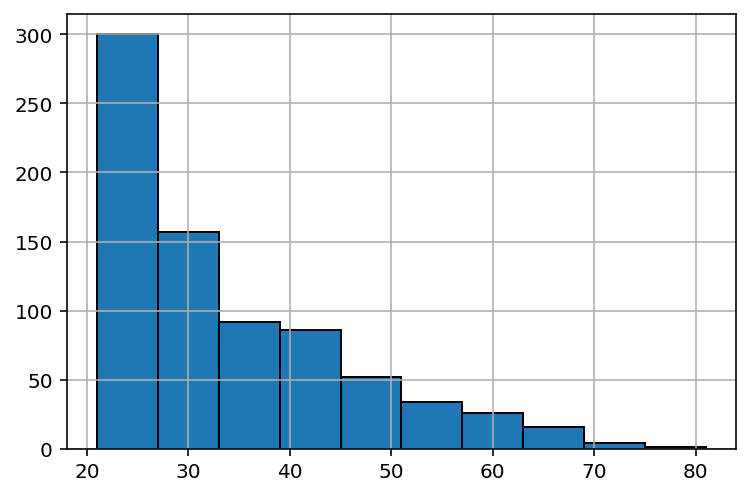

In [7]:
df["Age"].hist(edgecolor = "black");

## 3. Missing Value Analysis

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [10]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

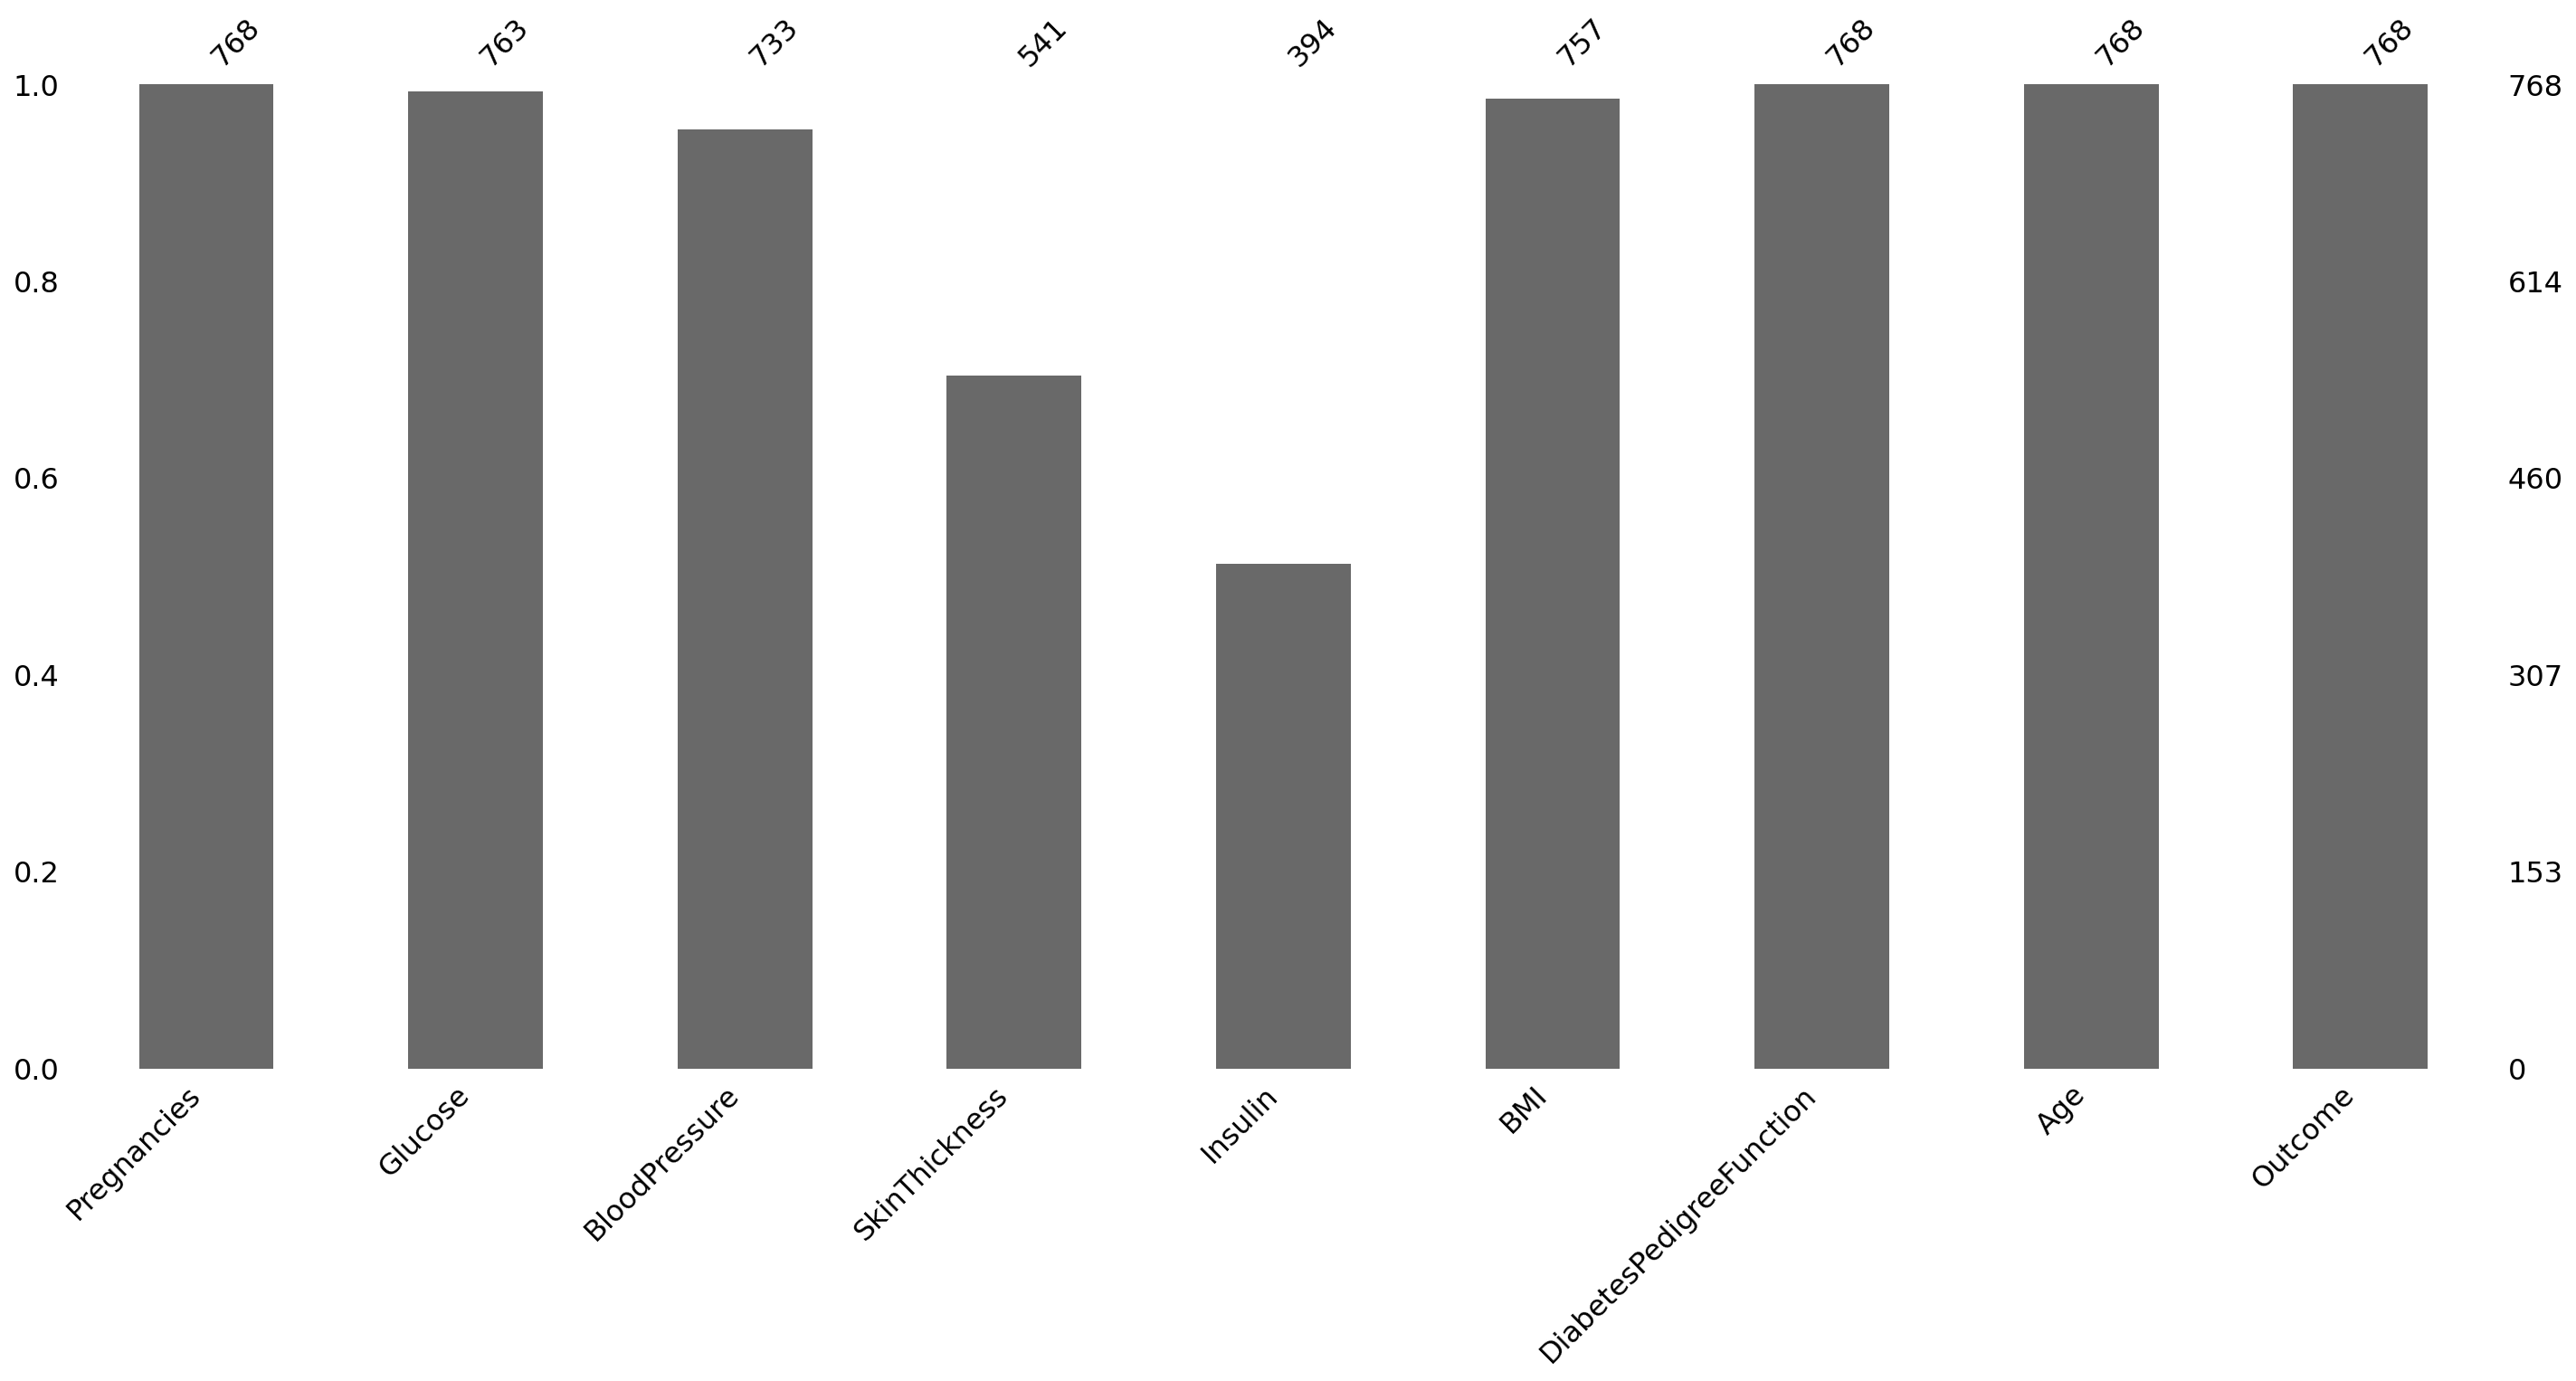

In [11]:
import missingno as msno
msno.bar(df);

In [12]:
def carp(x,y):
    
    z = x*y
    
    return z


In [13]:
carp(4,5)

20

In [14]:
# The missing values will be filled with the median values of each variable.

def median_target(var):   
    
    temp = df[df[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp

In [15]:
columns = df.columns

columns = columns.drop("Outcome")

In [16]:
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.00
1,1,140.00


In [18]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.

columns = df.columns

columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [19]:
df.loc[(df['Outcome'] == 0 ) & (df["Pregnancies"].isnull()), "Pregnancies"]

Series([], Name: Pregnancies, dtype: int64)

In [20]:
df[(df['Outcome'] == 0 ) & (df["BloodPressure"].isnull())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## 4. Outliers Analysis

In [21]:
Q1 = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [22]:
lower

40.0

In [23]:
upper

104.0

In [24]:
df[(df["BloodPressure"] > upper)].any(axis=None)

True

In [25]:
for feature in df:
    print(feature)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [26]:
for feature in df:
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [28]:
df.shape

(768, 9)

## 5. Feature Engineering

In [29]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3


In [31]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"     

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3


In [33]:
df["NewInsulinScore"] = df.apply(set_insulin, axis=1)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal


In [35]:
#df.drop("NewInsulinScore", inplace = True, axis = 1)
#df.head()

In [36]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")

df["NewGlucose"] = NewGlucose

df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]

df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]

df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]

df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,Obesity 1,Abnormal,Secret
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,Overweight,Normal,Normal
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,Normal,Abnormal,Secret
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,Overweight,Normal,Normal
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,Obesity 3,Abnormal,Secret


## 6. One-hot Encoding

In [38]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1,0,0,1,0,0,0,0,0,0,1


In [40]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

## 7. Feature Standartization

In [41]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [42]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [43]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31
2,8,183.00,64.00,32.00,169.50,23.30,0.67,32
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33


In [44]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
index

RangeIndex(start=0, stop=768, step=1)

In [46]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.60,0.77,0.00,1.00,1.00,0.17,0.67,1.24
1,-0.40,-0.79,-0.38,0.14,0.00,-0.60,-0.06,0.12
2,1.00,1.63,-0.50,0.57,1.00,-0.96,0.78,0.18
3,-0.40,-0.69,-0.38,-0.71,-0.13,-0.43,-0.54,-0.47
4,-0.60,0.49,-2.00,1.00,0.98,1.21,5.01,0.24


In [48]:
X = pd.concat([X, categorical_df], axis = 1)

In [49]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.60,0.77,0.00,1.00,1.00,0.17,0.67,1.24,1,0,0,0,0,0,0,0,0,1
1,-0.40,-0.79,-0.38,0.14,0.00,-0.60,-0.06,0.12,0,0,0,1,0,1,0,1,0,0
2,1.00,1.63,-0.50,0.57,1.00,-0.96,0.78,0.18,0,0,0,0,0,0,0,0,0,1
3,-0.40,-0.69,-0.38,-0.71,-0.13,-0.43,-0.54,-0.47,0,0,0,1,0,1,0,1,0,0
4,-0.60,0.49,-2.00,1.00,0.98,1.21,5.01,0.24,0,0,1,0,0,0,0,0,0,1


## 8. Model

LR: 0.847539 (0.032028)
KNN: 0.837235 (0.031427)
CART: 0.838602 (0.026456)
RF: 0.878947 (0.030074)
SVM: 0.848855 (0.035492)
XGB: 0.880297 (0.029243)
LightGBM: 0.885526 (0.035487)


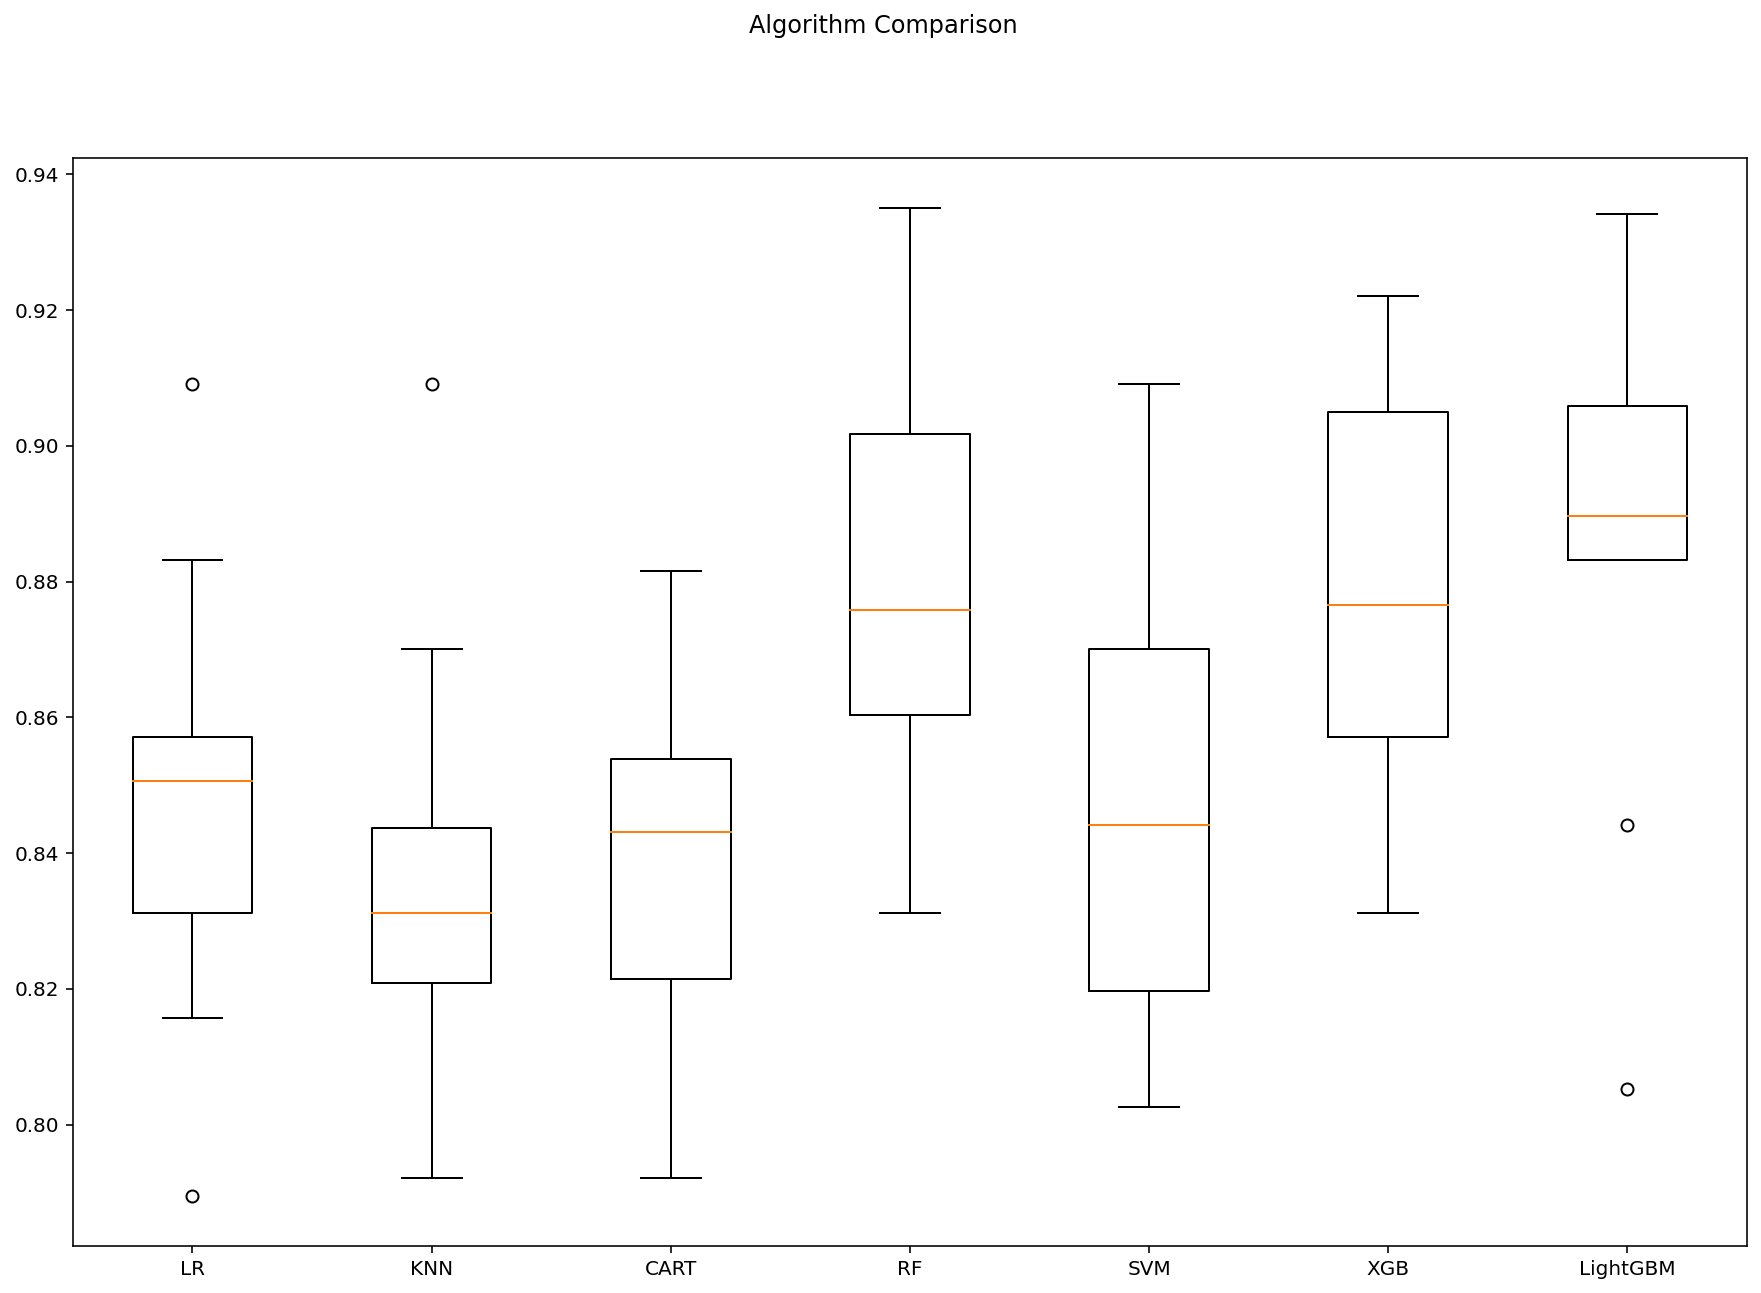

In [50]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



## 9. Model Optimizasyonu (Model Tunning)

### 9.1. Random Forests Tuning

In [51]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}



In [52]:
rf_model = RandomForestClassifier(random_state = 12345)

In [53]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 12.1min finished


In [54]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 500}

### 9.1.1. RF Final Model

In [55]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [56]:
rf_tuned = rf_tuned.fit(X,y)

In [57]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.890686944634313

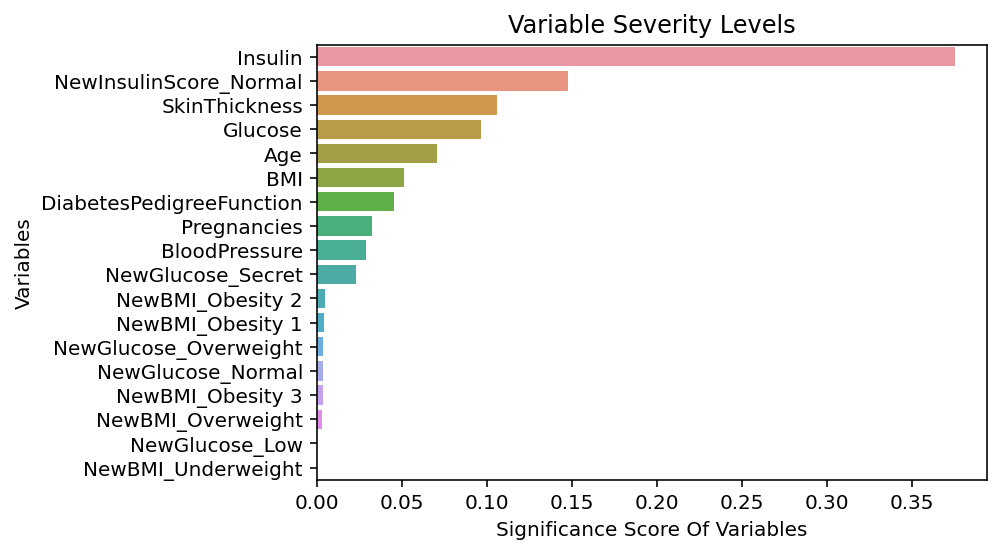

In [58]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 9.2. LightGBM Model Tuning

In [59]:
lgbm = LGBMClassifier(random_state = 12345)

In [60]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [61]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.1min finished


In [62]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

### 9.2.1 LightGBM Final Model

In [63]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [64]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.8959330143540669

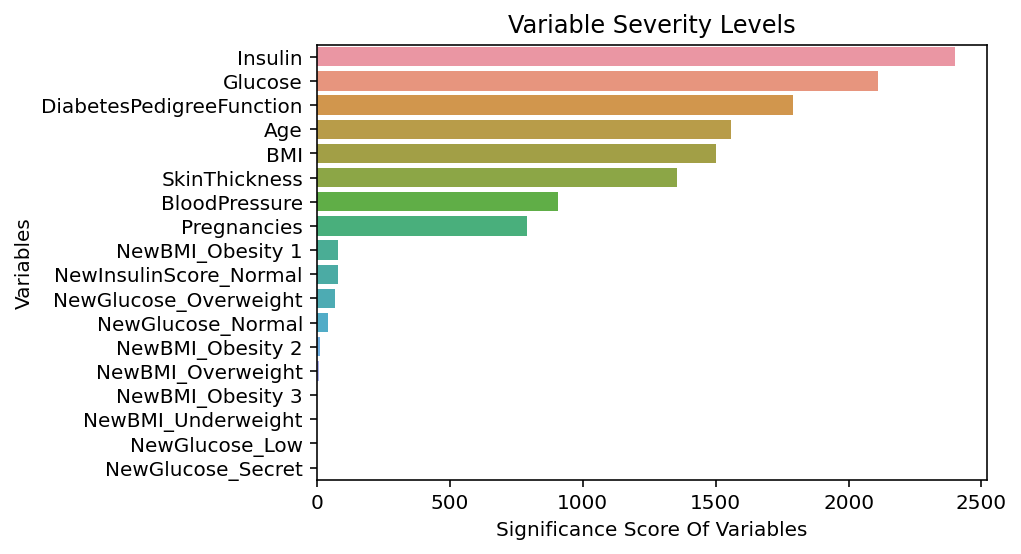

In [65]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 9.3. XGBoost Model Tuning

In [66]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [67]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [68]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 45.3min finished


In [69]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_samples_split': 0.1,
 'n_estimators': 1000,
 'subsample': 1.0}

### 9.3.1. XGBoost Final Model

In [70]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [71]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.898462064251538

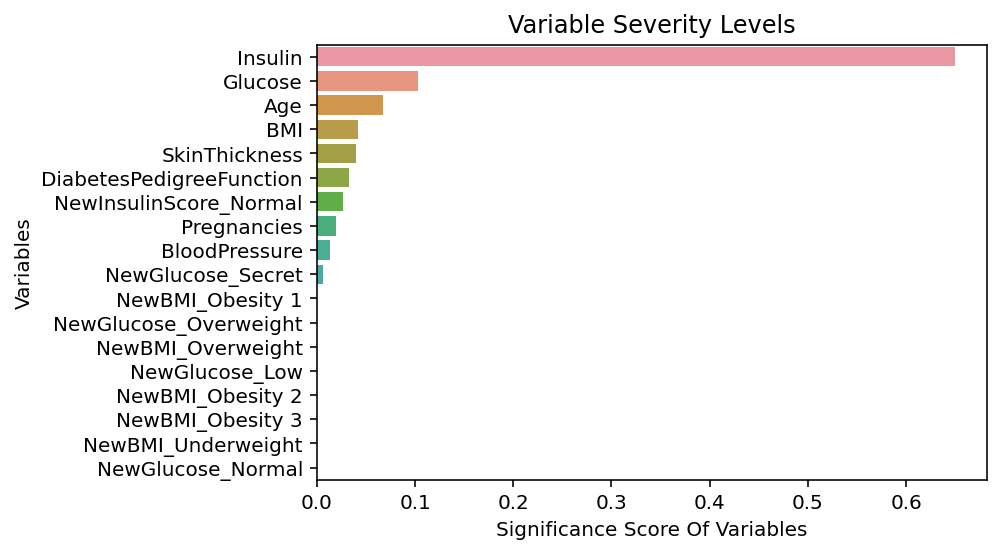

In [72]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## 10. Comparison of Final Models

In [73]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.886791 (0.028298)
XGB: 0.886757 (0.021597)
LightGBM: 0.892003 (0.033222)


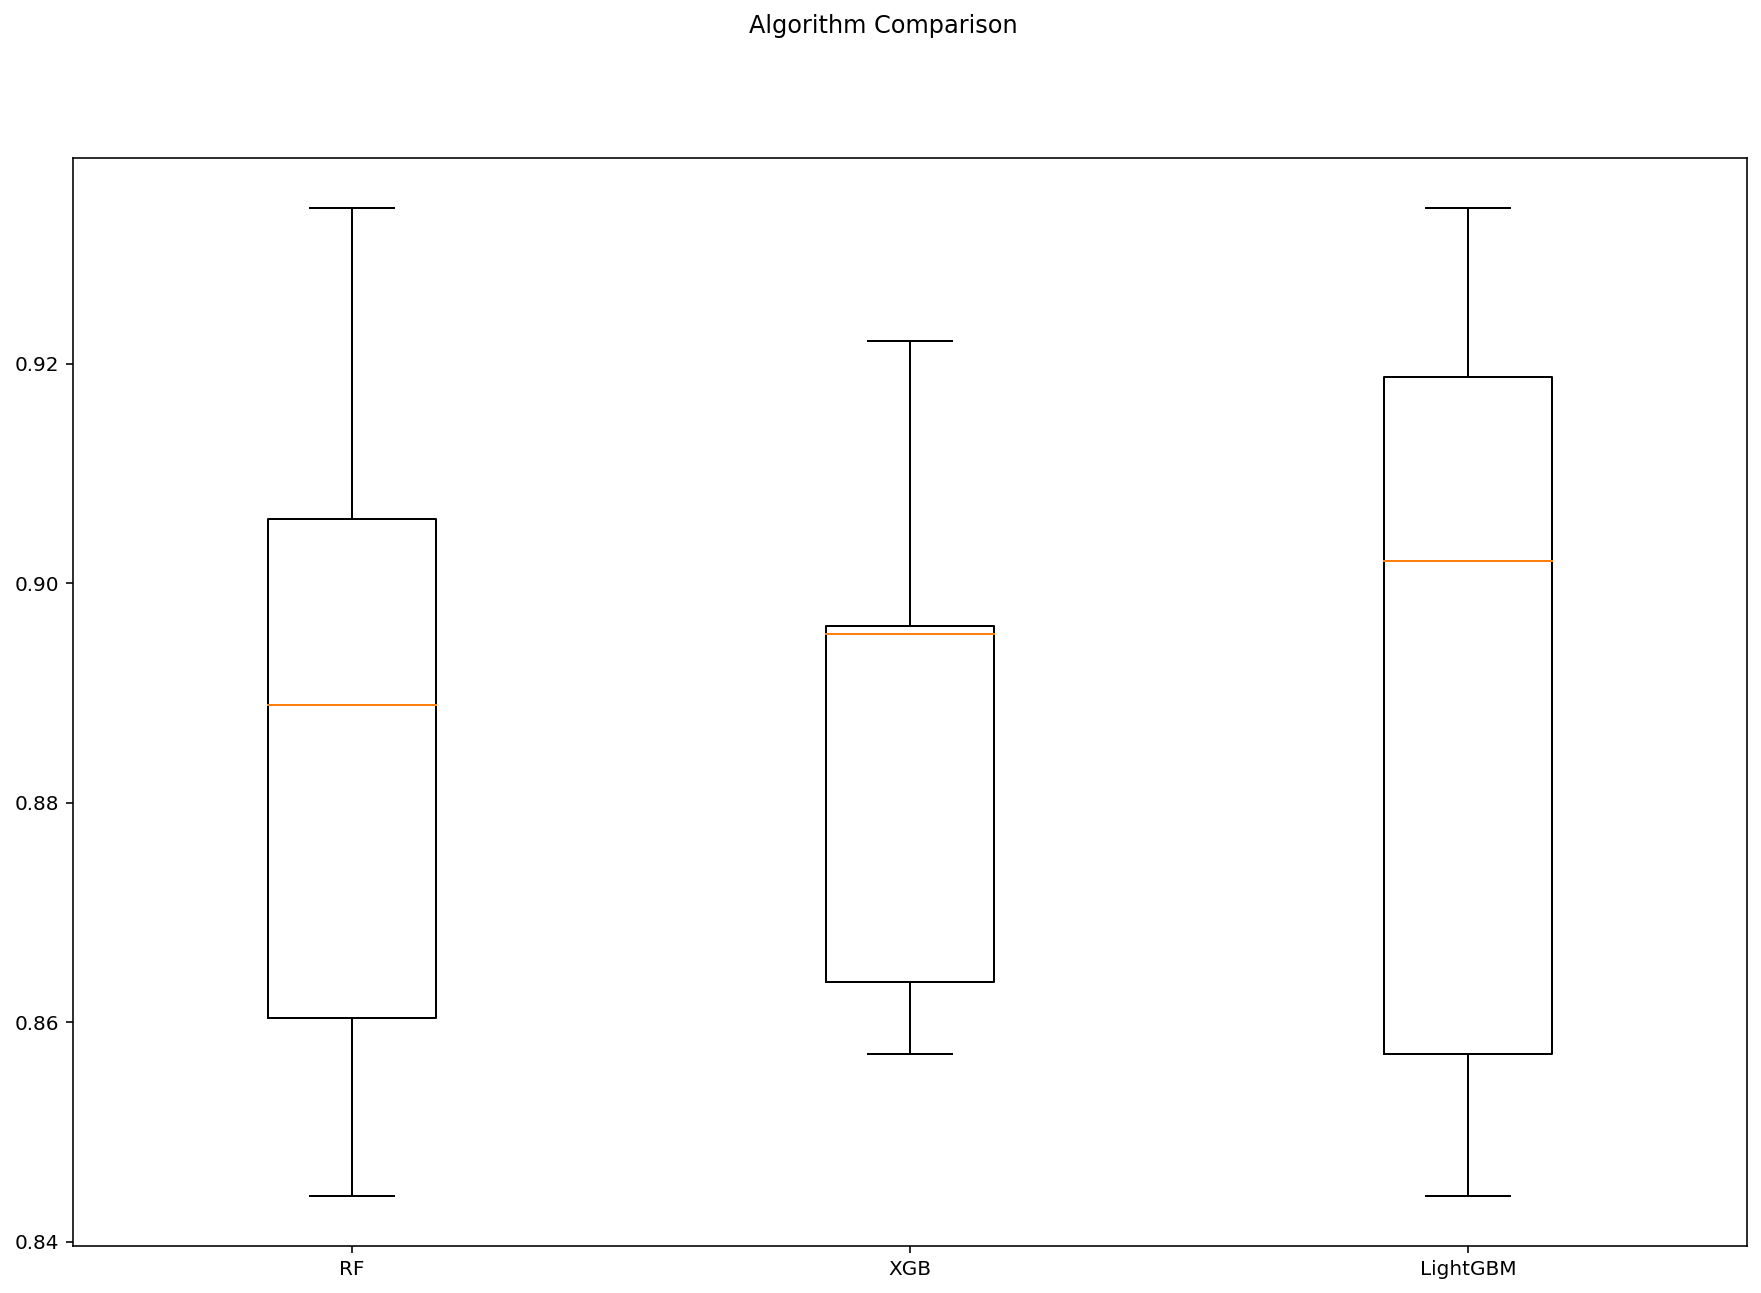

In [74]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 11. Conclusion

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of LightBM hyperparameter optimization became the model with the highest Cross Validation Score value. (0.89)



Note:

* After this notebook, my aim is to prepare 'kernel' which is 'not clear' data set.

* If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

* Thank you for your suggestion and votes ;)